<h1>Grover's Algorithm</h1>
<p style = "font-size: 20px">
Grover's algorithm is a quantum algorithm that efficiently searches an unsorted database or performs an unstructured search, providing a quadratic speedup over classical algorithms for this task. It achieves this by amplifying the probability of finding the desired solution(s) through quantum superposition and interference.</p>

<img src="Groverpic.png">

<p style="font-size: 25px"><b>1. Oracle:</b></p>

This serves as a "black box" function that identifies the solution state(s) within the search space.
It doesn't reveal the solution directly, but flips the phase of the good state(s) -->(w) in the superposition while leaving others unchanged.
The design of the oracle is specific to the problem you're tackling and often involves conditional phase shift operations based on the state properties.
<p style="font-size: 25px"><b>2. Grover Diffusion Operator (Diffuser):</b></p>

This operator acts like a "flip flop" on the amplitudes of the superposition states.
It amplifies the amplitude of the good state(s) -->(w) while decreasing the amplitudes of others, pushing the system towards the desired solution.
It's constructed using controlled rotations and Hadamard gates and applied iteratively after the oracle.

<p style = "font-size: 25px">Imagine searching a huge room for a friend. You have two tools:<br><br>
<b>Flashlight:</b> This "oracle" highlights your friend wherever they are.<br><br>
<b>Room diffuser:</b> This "diffusion operator" pushes everyone else away from the flashlight beam, making your friend stand out even more.<br><br>
By repeatedly using both tools, you quickly find your friend in the vast room, much faster than checking everyone one by one! That's what Grover's algorithm does in quantum computing, with qubits instead of people and clever gates instead of tools.</p>

<img src="Grtime.png">

<h1>Let's Build it!</h1>

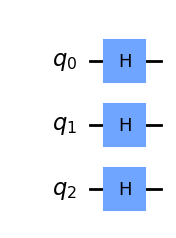

In [35]:
from qiskit import QuantumCircuit
import matplotlib.pyplot as plt

GroverCircuit = QuantumCircuit(3)
GroverCircuit.h(range(3))
GroverCircuit.draw("mpl")

<p style = "font-size: 25px">All probablities are the same</p>

<img src = "Gr1.png" height = '400' width = '400'>

<p style="font-size: 27px"><b>Firstly: The oracle:</b></p>

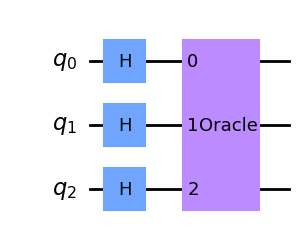

In [36]:
def oracle():
    qc = QuantumCircuit(3)
    qc.ccz(0,1,2)           #This is what's inside the oracle.
    return qc.to_gate(label="Oracle")
GroverCircuit.append(oracle(),[0,1,2])
GroverCircuit.draw('mpl')


<h2>What does the oracle do?</h2>

<p style="font-size: 20px">Firstly we applied H gate to all qubits to make them all in superposition</p>
<p style="font-size: 20px">Then the oracle will simply go to the selected state(s) -->(w) and change the phase!</p><br>

<p style="font-size: 20px">In our case the example is w = |111> and after we draw the qsphere we see:</p>

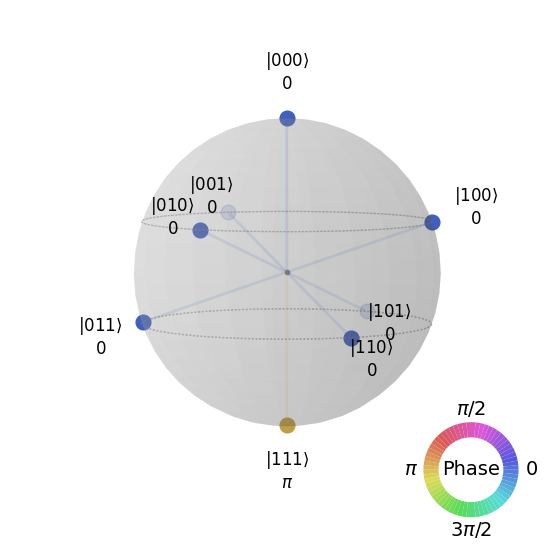

In [37]:
from qiskit.visualization import plot_state_qsphere
plot_state_qsphere(GroverCircuit,show_state_phases=True)

<img src = "Gr2.png" height = '400' width = '400'><br>
<p style="font-size: 20px">Since the selected state is |111> we can see that the oracle did its job and simply flagged (Changed the phase) of the selected state (w)</p>

<p style="font-size: 27px"><b>Secondly: The Diffuser:</b></p>

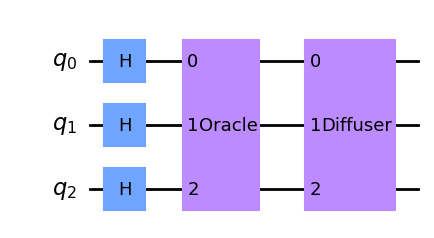

In [38]:
def diffuser():
    qc = QuantumCircuit(3)
    qc.h(range(3))
    qc.x(range(3))
    qc.ccz(0,1,2)
    qc.h(range(3))
    return qc.to_gate(label="Diffuser")
GroverCircuit.append(diffuser(),[0,1,2])
GroverCircuit.draw('mpl')

<h2>What does the diffuser do?</h2>

<p style = "font-size: 25px"><b>1-Reflection:</b> Flips amplitudes relative to the mean, pushing potential solutions towards the positive z-axis and others towards the negative.<br><br>
<b>2-Conditional Phase Flip:</b> Boosts the amplitudes of specific target states (solutions) by 180 degrees.<br>

<img src="Gr3.png" height = '400' width='400'>

<p style="font-size: 20px"></p>

<p style = "font-size: 25px">Below you will find another implementation of grover using a matrix:</p>

{'100': 30, '110': 28, '001': 40, '111': 807, '011': 29, '101': 30, '000': 29, '010': 31}


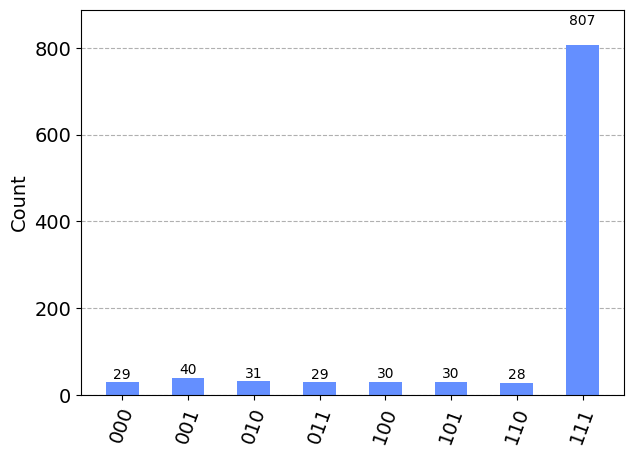

In [39]:
from qiskit.quantum_info import Operator
from qiskit import QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

U = Operator([[1,0,0,0,0,0,0,0],     #|000>
                [0,1,0,0,0,0,0,0],   #|001>
                [0,0,1,0,0,0,0,0],   #|010>
                [0,0,0,1,0,0,0,0],   #|011>
                [0,0,0,0,1,0,0,0],   #|100>
                [0,0,0,0,0,1,0,0],   #|101>
                [0,0,0,0,0,0,1,0],   #|110
                [0,0,0,0,0,0,0,-1]]) #|111> we change the phase by making it -1 instead of 1
n = 3
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')

qc = QuantumCircuit(qr, cr)

for i in range(n):
    qc.h(i)

qc.barrier()

qc.append(U, qr)

qc.barrier()

for qubit in range(n):
    qc.h(qubit)
for qubit in range(n):
    qc.x(qubit)
qc.h(n-1)
qc.mct(list(range(n-1)), n-1)
qc.h(n-1)
for qubit in range(n):
    qc.x(qubit)
for qubit in range(n):
    qc.h(qubit)

qc.barrier()

qc.measure([0,1,2],[0,1,2])

qc.draw('mpl')



job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)

counts = job.result().get_counts(qc)

print(counts)

plot_histogram(counts)

<p style = "font-size: 25px">If we wanted to choose something else we simply change the U variable Like so:</p>

{'101': 30, '011': 25, '111': 31, '110': 31, '100': 801, '001': 32, '010': 30, '000': 44}


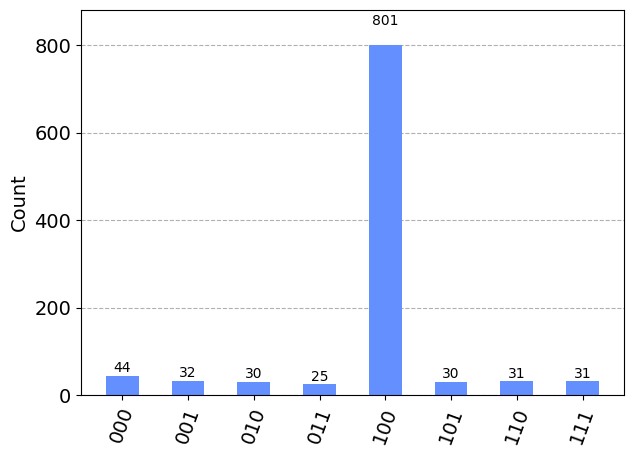

In [40]:
U = Operator([[1,0,0,0,0,0,0,0],     #|000>
                [0,1,0,0,0,0,0,0],   #|001>
                [0,0,1,0,0,0,0,0],   #|010>
                [0,0,0,1,0,0,0,0],   #|011>
                [0,0,0,0,-1,0,0,0],  #|100> we change the phase by making it -1 instead of 1
                [0,0,0,0,0,1,0,0],   #|101>
                [0,0,0,0,0,0,1,0],   #|110
                [0,0,0,0,0,0,0,1]])  #|111> 
n = 3
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')

qc = QuantumCircuit(qr, cr)

for i in range(n):
    qc.h(i)

qc.barrier()

qc.append(U, qr)

qc.barrier()

for qubit in range(n):
    qc.h(qubit)
for qubit in range(n):
    qc.x(qubit)
qc.h(n-1)
qc.mct(list(range(n-1)), n-1)
qc.h(n-1)
for qubit in range(n):
    qc.x(qubit)
for qubit in range(n):
    qc.h(qubit)

qc.barrier()

qc.measure([0,1,2],[0,1,2])

qc.draw('mpl')



job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)

counts = job.result().get_counts(qc)

print(counts)

plot_histogram(counts)

<p style = "font-size: 25px">BTW you can choose multiple (w) At the same time!

{'010': 503, '100': 521}


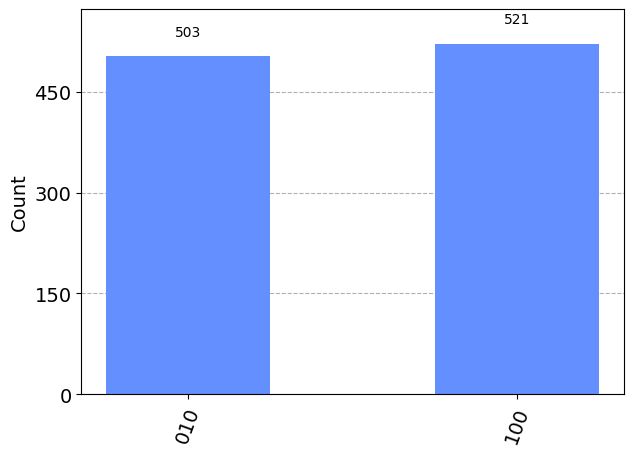

In [41]:
from qiskit.quantum_info import Operator
from qiskit import QuantumRegister, ClassicalRegister, execute, Aer
from qiskit.visualization import plot_histogram

U = Operator([[1,0,0,0,0,0,0,0],     #|000>
                [0,1,0,0,0,0,0,0],   #|001>
                [0,0,-1,0,0,0,0,0],   #|010> we change the phase by making it -1 instead of 1
                [0,0,0,1,0,0,0,0],   #|011>
                [0,0,0,0,-1,0,0,0],  #|100> we change the phase by making it -1 instead of 1
                [0,0,0,0,0,1,0,0],   #|101>
                [0,0,0,0,0,0,1,0],   #|110
                [0,0,0,0,0,0,0,1]])  #|111> 
n = 3
qr = QuantumRegister(n, 'q')
cr = ClassicalRegister(n, 'c')

qc = QuantumCircuit(qr, cr)

for i in range(n):
    qc.h(i)

qc.barrier()

qc.append(U, qr)

qc.barrier()

for qubit in range(n):
    qc.h(qubit)
for qubit in range(n):
    qc.x(qubit)
qc.h(n-1)
qc.mct(list(range(n-1)), n-1)
qc.h(n-1)
for qubit in range(n):
    qc.x(qubit)
for qubit in range(n):
    qc.h(qubit)

qc.barrier()

qc.measure([0,1,2],[0,1,2])

qc.draw('mpl')



job = execute(qc, Aer.get_backend('qasm_simulator'), shots=1024)

counts = job.result().get_counts(qc)

print(counts)

plot_histogram(counts)